## 0. Settings

In [1]:
import numpy as np
import torch
from utils import fix_randomness, Arguments

In [2]:
from defenses.loader import base_loader as data_loader
from defenses.model import get_model
from defenses.trainer import PGDAdvTrainer as Trainer

args = Arguments()
args.gpu = 2
args.name = "PGDAdv_CIFAR10_ResNet18_Step"
args.save_path = "./_checkpoint/"
args.model = "ResNet18"
args.data = "CIFAR10"
args.num_classes = 10
args.random_seed = 0
args.val_info = 1000

args.init_lr = 0.1
args.optimizer = "SGD(lr="+str(args.init_lr)+", momentum=0.9, weight_decay=5e-4)"

# Cosine
# args.max_epoch = 100
# args.scheduler = "Cosine"
# args.scheduler_type = "Epoch"

# Cyclic
# args.max_epoch = 30
# args.scheduler = "Cyclic(0, 0.3)"
# args.scheduler_type = "Iter"

# Stepwise
args.max_epoch = 110
args.scheduler = "Step([100, 105], 0.1)"
args.scheduler_type = "Epoch"

args.trainer = {
    "eps":8/255,
    "alpha":2/255,
    "steps":10,
    "random_start":True,
}

args.test_eps = args.trainer["eps"] #8/255
args.test_alpha = 2/255
args.test_steps = 10

## 1. Train

In [3]:
torch.cuda.set_device(args.gpu)

In [4]:
# Set Train, Validation, Test Loader
val_info = np.random.RandomState(seed=args.random_seed).permutation(args.val_info).tolist()
train_loader, val_loader, test_loader = data_loader(data_name=args.data,
                                                    shuffle_train=True,
                                                    val_info=val_info)

# train_loader_ns, _, _ = data_loader(data_name=args.data,
#                                     shuffle_train=False,
#                                     transform_train=transforms.ToTensor(), 
#                                     val_info=val_info) # w/o Suffle

# Set Model
model = get_model(name=args.model, num_classes=args.num_classes).cuda()

# Set Trainer
trainer = Trainer(model, **args.trainer)
trainer.record_rob(train_loader, val_loader,
                   eps=args.test_eps, alpha=args.test_alpha,
                   steps=args.test_steps)

Files already downloaded and verified
Files already downloaded and verified
Data Loaded (w/ Validation Set)!
Train Data Length : 49000
Val Data Length : 1000
Test Data Length : 10000
ResNet18 is loaded.


In [5]:
# Train Model
trainer.train(train_loader=train_loader, max_epoch=args.max_epoch,
              optimizer=args.optimizer, scheduler=args.scheduler,
              scheduler_type=args.scheduler_type,
              save_type="Epoch", save_path=args.save_path+args.name,
              save_overwrite=True, record_type="Epoch")

[PGDAdvTrainer]
Training Information.
-Epochs: 110
-Optimizer: SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.1
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)
-Scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7fc30a8690f0>
-Save Path: ./_checkpoint/PGDAdv_CIFAR10_ResNet18_Step
-Save Type: Epoch
-Record Type: Epoch
-Device: cuda:2
-------------------------------------------------------------------------------------------------------------------
Epoch   Loss     Clean(Tr)   FGSM(Tr)   PGD(Tr)   GN(Tr)    Clean(Val)   FGSM(Val)   PGD(Val)   GN(Val)   lr       
1       2.0300   33.3008     23.9258    22.7539   34.4727   33.8000      23.3000     22.8000    33.4000   0.1000   
-------------------------------------------------------------------------------------------------------------------
2       1.9709   33.7891     22.5586    27.0508   34.0820   38.5000      28.1000     25.6000    36.5000   0.1000   
----------------------------------

33      1.5141   75.0977     51.2695    47.5586   73.0469   74.3000      47.7000     44.1000    70.6000   0.1000   
-------------------------------------------------------------------------------------------------------------------
34      1.4318   71.9727     48.2422    46.4844   69.0430   70.3000      48.8000     44.6000    69.3000   0.1000   
-------------------------------------------------------------------------------------------------------------------
35      1.5658   71.7773     50.0977    48.9258   72.8516   73.0000      49.1000     44.6000    69.7000   0.1000   
-------------------------------------------------------------------------------------------------------------------
36      1.3301   75.6836     50.0977    48.3398   75.6836   73.4000      48.9000     43.9000    71.8000   0.1000   
-------------------------------------------------------------------------------------------------------------------
37      1.4123   75.5859     49.6094    49.3164   71.0938   73.3000     

69      1.3391   74.7070     53.7109    49.1211   71.5820   76.4000      51.5000     44.8000    73.0000   0.1000   
-------------------------------------------------------------------------------------------------------------------
70      1.3364   76.1719     53.4180    47.8516   74.8047   74.5000      49.1000     46.7000    73.3000   0.1000   
-------------------------------------------------------------------------------------------------------------------
71      1.4400   76.8555     55.8594    49.4141   76.9531   75.6000      48.7000     46.6000    73.2000   0.1000   
-------------------------------------------------------------------------------------------------------------------
72      1.3233   74.4141     50.9766    47.9492   73.0469   72.3000      51.3000     47.5000    71.5000   0.1000   
-------------------------------------------------------------------------------------------------------------------
73      1.3169   73.9258     54.8828    50.0977   74.0234   72.8000     

105     1.0960   87.8906     66.6016    61.1328   83.2031   83.3000      57.1000     51.6000    79.5000   0.0100   
-------------------------------------------------------------------------------------------------------------------
106     0.9873   88.2812     69.8242    62.7930   87.4023   82.5000      57.6000     52.6000    81.4000   0.0010   
-------------------------------------------------------------------------------------------------------------------
107     1.0181   89.9414     70.2148    64.7461   87.4023   82.7000      57.6000     52.3000    81.8000   0.0010   
-------------------------------------------------------------------------------------------------------------------
108     1.0202   87.0117     66.8945    63.0859   87.5000   83.2000      57.7000     52.1000    81.8000   0.0010   
-------------------------------------------------------------------------------------------------------------------
109     0.8472   89.7461     71.4844    63.5742   87.3047   83.3000     

In [7]:
trainer.save_all(args.save_path+args.name)

Saving Model
...Saved as pth to ./_checkpoint/PGDAdv_CIFAR10_ResNet18_Step.pth !
Saving Records
...Saved as csv to ./_checkpoint/PGDAdv_CIFAR10_ResNet18_Step.csv !


## 2. Record Visualization

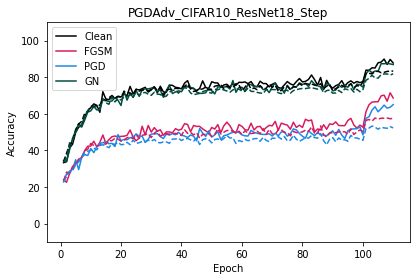

In [8]:
# Plot Train and Test Accuracy
trainer.rm.plot(title=args.name, xlabel="Epoch", ylabel="Accuracy",
                figsize=(6, 4),
                x_key='Epoch',
                y_keys=['Clean(Tr)', 'FGSM(Tr)', 'PGD(Tr)', 'GN(Tr)',
                        'Clean(Val)', 'FGSM(Val)', 'PGD(Val)', 'GN(Val)'],
                ylim=(-10, 110),
                colors=['k', '#D81B60', '#1E88E5', '#004D40']*2,
                labels=['Clean', 'FGSM', 'PGD', 'GN', '', '', '', ''],
                linestyles=['-', '-', '-', '-', '--', '--', '--', '--'],
               )

## 3. Performance

In [9]:
from torchattacks import VANILA, FGSM, PGD

### Standard Accuracy

In [10]:
atk = VANILA(model)
atk.save(data_loader=test_loader, save_path=None, verbose=True)

### Robust Accuracy

In [11]:
atk = FGSM(model, eps=args.test_eps)
atk.save(data_loader=test_loader, save_path=None, verbose=True)

In [12]:
atk = PGD(model, eps=args.test_eps, alpha=args.test_alpha, steps=10)
atk.save(data_loader=test_loader, save_path=None, verbose=True)

In [13]:
atk = PGD(model, eps=args.test_eps, alpha=args.test_alpha, steps=50)
atk.save(data_loader=test_loader, save_path=None, verbose=True)